In [1]:
import pandas as pd

In [2]:
air = pd.read_csv('airquality.csv')

In [3]:
air.columns.to_list()

['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']

In [4]:
air.shape

(153, 7)

In [5]:
air.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [6]:
air.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [8]:
air.count()

Ozone      116
Solar.R    146
Wind       153
Temp       153
Month      153
Day        153
dtype: int64

In [9]:
air.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [10]:
A = air.fillna(method='pad')
A.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,18.0,313.0,14.3,56,5,5


In [11]:
A = air.fillna(method='backfill')
A.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,28.0,299.0,14.3,56,5,5


In [12]:
import numpy as np

In [13]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].mean())
A.head()

0    41.00000
1    36.00000
2    12.00000
3    18.00000
4    42.12931
Name: Ozone, dtype: float64

In [14]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].median())
A.head()

0    41.0
1    36.0
2    12.0
3    18.0
4    31.5
Name: Ozone, dtype: float64

In [15]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].mode()[0])
A.head()

0    41.0
1    36.0
2    12.0
3    18.0
4    23.0
Name: Ozone, dtype: float64

In [16]:
# Drop rows with missing values
air.dropna(inplace=True)

In [17]:
from sklearn.impute import SimpleImputer
# Create a SimpleImputer object with the desired strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to the dataset and transform the missing values
air_imputed = imputer.fit_transform(air)
# Convert the imputed data back into a DataFrame
air_imputed_df = pd.DataFrame(air_imputed, columns=air.columns)
# Check the updated DataFrame
air_imputed_df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,23.0,299.0,8.6,65.0,5.0,7.0


In [18]:
# Select the columns to be transformed
columns_to_transform = ['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']

In [19]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
# Apply StandardScaler transformation to the selected columns
air_standard_scaled = scaler.fit_transform(air[columns_to_transform])
# Convert the scaled data into a DataFrame
air_standard_scaled_df = pd.DataFrame(air_standard_scaled, columns=columns_to_transform)
# Describe the StandardScaler DataFrame
air_standard_scaled_df.describe()


,Ozone,Solar.R,Wind,Temp,Month,Day
count,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02
mean,-8.801768e-17,-1.265254e-16,2.785560e-16,-4.240852e-16,-1.120225e-16,1.240249e-16
std,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00
min,-1.240700e+00,-1.959448e+00,-2.157084e+00,-2.191727e+00,-1.510938e+00,-1.724290e+00
25%,-7.275038e-01,-7.857746e-01,-7.170778e-01,-7.160148e-01,-8.291733e-01,-8.013427e-01
50%,-3.350597e-01,2.446331e-01,-6.766325e-02,1.272493e-01,-1.474086e-01,6.236130e-03
75%,6.007685e-01,7.791227e-01,4.405743e-01,7.069934e-01,1.216121e+00,7.561308e-01
max,3.800697e+00,1.644224e+00,3.038233e+00,2.024594e+00,1.216121e+00,1.736762e+00


In [20]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Apply MinMaxScaler transformation to the selected columns
air_minmax_scaled = scaler.fit_transform(air[columns_to_transform])
# Convert the scaled data into a DataFrame
air_minmax_scaled_df = pd.DataFrame(air_minmax_scaled, columns=columns_to_transform)
# Describe the MinMaxScaler DataFrame
air_minmax_scaled_df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.246102,0.543736,0.415198,0.519820,0.554054,0.498198
std,0.199257,0.278753,0.193354,0.238249,0.368358,0.290240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101796,0.325688,0.277174,0.350000,0.250000,0.266667
50%,0.179641,0.611621,0.402174,0.550000,0.500000,0.500000
75%,0.365269,0.759939,0.500000,0.687500,1.000000,0.716667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.preprocessing import Binarizer
# Create a Binarizer object with the desired threshold
binarizer = Binarizer(threshold=0.5)
# Apply Binarizer transformation to the selected columns
air_binarized = binarizer.transform(air[columns_to_transform])
# Convert the binarized data into a DataFrame
air_binarized_df = pd.DataFrame(air_binarized, columns=columns_to_transform)
# Describe the Binarizer DataFrame
air_binarized_df.describe()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.0,111.0,111.0,111.0,111.0,111.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
from sklearn.linear_model import LinearRegression
# Split the data into features (X) and target variable (Y)
X = air[['Ozone']]
Y = air['Temp']
# Create a LinearRegression model
model = LinearRegression()
# Fit the model to the data
model.fit(X, Y)

LinearRegression()

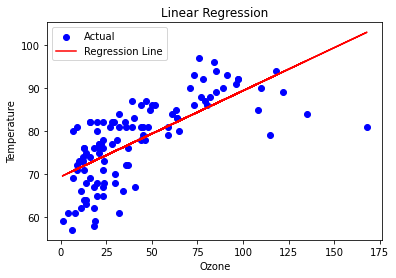

In [23]:
import matplotlib.pyplot as plt
# Make predictions on the features
predictions = model.predict(X)
# Create a scatter plot to show the original data points
plt.scatter(X['Ozone'], Y, color='blue', label='Actual')
# Plot the line representing the regression model
plt.plot(X['Ozone'], predictions, color='red',  label='Regression Line')
# Set labels and title for the plot
plt.xlabel('Ozone')
plt.ylabel('Temperature')
plt.title('Linear Regression')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Create a LinearRegression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Calculate the score (R-squared) on the testing data
score = model.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.5636519120905267


In [25]:
model.predict([[128]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.6542531])